In [2]:
from neural_implementation import neural_classification as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# UCITAVANJE PODATAKA I TESTIRANJE

df = pd.read_csv('../datasets/iris_extended.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
N = df.shape[0]
print(f'Ukupan broj podataka: {N}')

m = df.shape[1] - 1
print(f'Broj atributa svakog podatka: {m}')

attributes = list(df.drop('variety', axis=True).columns)
print(f'Atributi: {attributes}')

Ukupan broj podataka: 250
Broj atributa svakog podatka: 4
Atributi: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']


In [5]:
attr1 = 'petal.length'
attr2 = 'petal.width'
attributes = [attr1, attr2]
m = len(attributes)

N = df.shape[0]
print(f'Velicina skupa podataka: {N}')

Velicina skupa podataka: 250


In [6]:
classes = df['variety'].unique()
n_classes = len(classes)

print(f'Klase: {classes}')
print(f'Broj klasa: {n_classes}\n')

name_to_class_dict = dict(zip(classes, range(n_classes)))
class_to_name_dict = dict(zip(range(n_classes), classes))

print(f'Mapiranje imena klasa u numericke vrednosti:')
for name, cls in name_to_class_dict.items():
    print(f'{name} -> {cls}')

print()
print(f'Mapiranje numerickih vrednosti u odgovarajuce nazive klasa:')
for cls, name in class_to_name_dict.items():
    print(f'{cls} -> {name}')

Klase: ['Setosa' 'Versicolor' 'Virginica' 'Letosa' 'Helenica']
Broj klasa: 5

Mapiranje imena klasa u numericke vrednosti:
Setosa -> 0
Versicolor -> 1
Virginica -> 2
Letosa -> 3
Helenica -> 4

Mapiranje numerickih vrednosti u odgovarajuce nazive klasa:
0 -> Setosa
1 -> Versicolor
2 -> Virginica
3 -> Letosa
4 -> Helenica


In [7]:
mapper_cls_to_vec = {}
for i in range(n_classes):
    vec = np.zeros((n_classes,))
    vec[i] = 1
    
    mapper_cls_to_vec[i] = vec
    
print('Mapiranje numericke vrednosti u odgovarajuci vektor:')
for cls, vec in mapper_cls_to_vec.items():
    print(f'{cls} -> {vec}')

Mapiranje numericke vrednosti u odgovarajuci vektor:
0 -> [1. 0. 0. 0. 0.]
1 -> [0. 1. 0. 0. 0.]
2 -> [0. 0. 1. 0. 0.]
3 -> [0. 0. 0. 1. 0.]
4 -> [0. 0. 0. 0. 1.]


In [8]:
y_tmp = df['variety']

y = np.zeros((N, n_classes))
for i in range(N):
    cls = name_to_class_dict[y_tmp[i]]
    y[i] = mapper_cls_to_vec[cls]

In [9]:
X = np.ones((N, m + 1))
X[:, 1] = df[attr1]
X[:, 2] = df[attr2]
# X[:, 3] = df[attr1]**2
# X[:, 4] = df[attr2]**2

In [10]:
print(f'Podaci:')
print(X[:10])
print(' ...')

print(f'Ciljne promenljive:')
print(y[:10])
print(' ...')

Podaci:
[[1.  1.4 0.2]
 [1.  1.4 0.2]
 [1.  1.3 0.2]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  1.7 0.4]
 [1.  1.4 0.3]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  1.5 0.1]]
 ...
Ciljne promenljive:
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
 ...


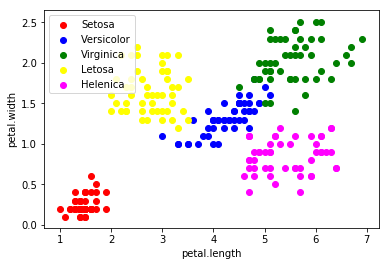

In [11]:
colors = ['red', 'blue', 'green', 'yellow', 'magenta']
for c, cls in zip(colors, classes):
    subsample = df.loc[df['variety'] == cls]
    plt.scatter(subsample[attr1], subsample[attr2], color=c)
    
plt.xlabel(attr1)
plt.ylabel(attr2)

plt.legend(classes)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    test_size=0.3, 
                                                    random_state=5)

In [13]:
print(f'X_train:')
print(X_train[:10])
print(' ...')
print()

print(f'y_train:')
print(y_train[:10])
print(' ...')
print()

print(f'X_test:')
print(X_test[:10])
print(' ...')
print()

print(f'y_test:')
print(y_test[:10])
print(' ...')

X_train:
[[1.  4.7 1.6]
 [1.  6.4 2. ]
 [1.  2.7 1.7]
 [1.  5.6 0.7]
 [1.  2.9 1.6]
 [1.  1.3 0.2]
 [1.  1.5 0.4]
 [1.  4.7 1.1]
 [1.  4.3 1.3]
 [1.  3.  1.3]]
 ...

y_train:
[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
 ...

X_test:
[[1.  1.3 0.3]
 [1.  5.1 1. ]
 [1.  1.5 0.2]
 [1.  5.2 0.5]
 [1.  5.4 0.7]
 [1.  4.8 0.6]
 [1.  3.5 1. ]
 [1.  5.8 1.6]
 [1.  5.3 1.9]
 [1.  3.2 1.6]]
 ...

y_test:
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]
 ...


In [14]:
nn = nc.NeuralNetwork(m, [3*m], n_classes, eps_init=1e-1)

nn.print_network()
print()

nn.print_layer_mapper_sizes()
print()

print('Initial model:')
nn.print_model()

~ Neural network ~
Layer 1:
[1. 1. 1.]
Layer 2:
[1. 1. 1. 1. 1. 1. 1.]
Layer 3:
[1. 1. 1. 1. 1.]

Dimenzije matrica modela koji mapiraju slojeve:
0 -> 1: 6 x 3
1 -> 2: 5 x 7

Initial model:
Model:
W_0: 0 -> 1
[[ 0.04957532  0.04080649 -0.03381336]
 [ 0.02036065  0.01959711 -0.09603476]
 [ 0.03638041  0.03572848  0.01948144]
 [ 0.09671285  0.02794053 -0.03678672]
 [-0.02930802  0.00946    -0.0815303 ]
 [ 0.0348925  -0.07113272 -0.08468602]]
W_1: 1 -> 2
[[ 0.09825996 -0.04297535  0.01940506  0.05822244  0.05840962 -0.03497529
   0.09267969]
 [ 0.0547775  -0.04050907 -0.06199802  0.08497414  0.04589829  0.08871843
   0.06038229]
 [-0.00718767 -0.09575788 -0.02822012  0.06174704  0.05362791  0.04208621
  -0.04806742]
 [-0.03499531  0.02504902  0.07831306  0.02004851  0.08170671  0.0530291
  -0.0867822 ]
 [ 0.06982133 -0.01735448  0.00061926  0.01912369  0.05675023  0.04934449
   0.09176809]]


In [15]:
lambdas = [0] + [0.01 * (1.5**i) for i in range(8)]
print('lamda parameters:')
print(lambdas)

lamda parameters:
[0, 0.01, 0.015, 0.0225, 0.03375, 0.050625, 0.0759375, 0.11390625, 0.170859375]


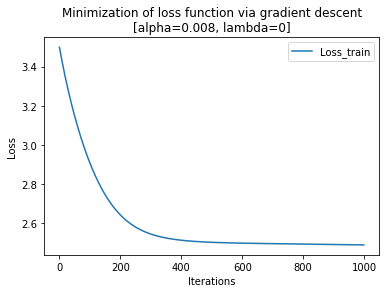

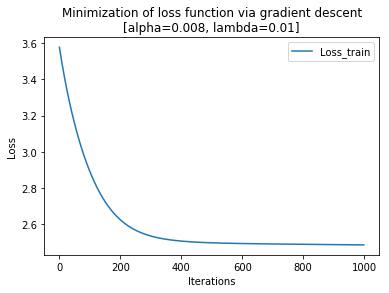

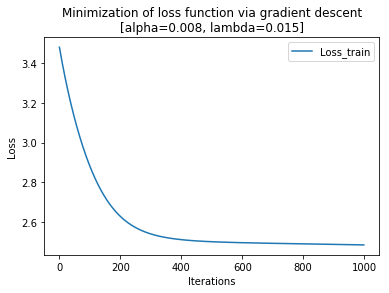

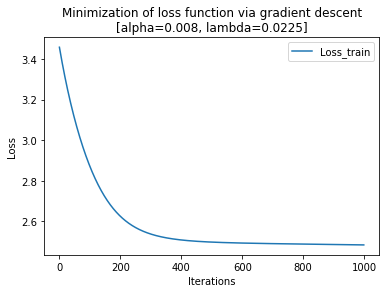

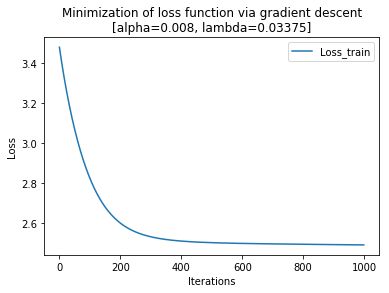

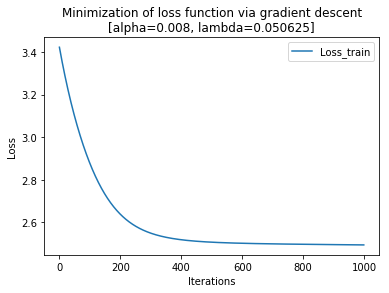

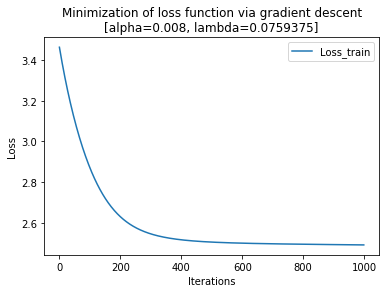

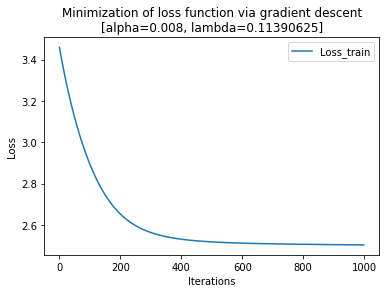

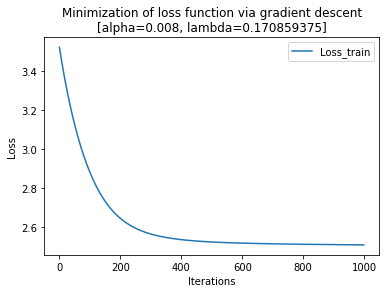

In [16]:
classifiers = [nn.fit(X_train, 
                      y_train, 
                      alpha=0.008, 
                      lambda_param=lambda_param, 
                      plot=True,
                      gc_it=100,
                      gc_log_path='./gc_log.txt') 
               for lambda_param in lambdas]

In [17]:
losses_test = [clf.loss(X_test, y_test) for clf in classifiers]

print('Funkcije gubitka za svaki klasifikator posebno na test skupu:')
for i, loss in enumerate(losses_test):
    print(f'Klasifikator {i + 1}: Loss = {loss}')

Funkcije gubitka za svaki klasifikator posebno na test skupu:
Klasifikator 1: Loss = 2.4886896397492886
Klasifikator 2: Loss = 2.48422214054695
Klasifikator 3: Loss = 2.4860275532818124
Klasifikator 4: Loss = 2.482707966604025
Klasifikator 5: Loss = 2.4902129347581994
Klasifikator 6: Loss = 2.492723924165292
Klasifikator 7: Loss = 2.4907170841685518
Klasifikator 8: Loss = 2.5023755215934917
Klasifikator 9: Loss = 2.5088004934655515


In [18]:
min_loss = float('inf')
best_clf = None

for i, loss in enumerate(losses_test):
    if loss < min_loss:
        min_loss = loss
        best_clf = classifiers[i]
        
print(f'Najmanji gubitak (na test skupu) za svaki klasifikator: {min_loss}')
print(f'Regularizacioni parametar lambda za koji je naucen najbolji model: '
      f'{best_clf.lambda_learned}')      
print('Model najboljeg klasifikatora:')

best_clf.print_model()

Najmanji gubitak (na test skupu) za svaki klasifikator: 2.482707966604025
Regularizacioni parametar lambda za koji je naucen najbolji model: 0.0225
Model najboljeg klasifikatora:
Model:
W_0: 0 -> 1
[[ 0.14073933  0.25730746  0.11760591]
 [ 0.12207927  0.21814008  0.04480872]
 [ 0.02285128  0.09233217  0.00801104]
 [ 0.05904774  0.29514015 -0.0324211 ]
 [ 0.04051749  0.26274321  0.13578836]
 [-0.00604025 -0.05090551 -0.06192953]]
W_1: 1 -> 2
[[-0.27265263 -0.37156537 -0.33787596 -0.19698393 -0.34961955 -0.36708736
  -0.0261496 ]
 [-0.431606   -0.21869139 -0.25850751 -0.20835828 -0.20236678 -0.24924746
  -0.16022844]
 [-0.5802118  -0.25865582 -0.10654239 -0.14255548 -0.16806479 -0.16403547
  -0.18366684]
 [-0.45620526 -0.25974484 -0.1986303  -0.13466282 -0.34513897 -0.24528915
  -0.14164093]
 [-0.60949605 -0.18159902 -0.16067071 -0.10888493 -0.09744706 -0.24103954
  -0.22553215]]


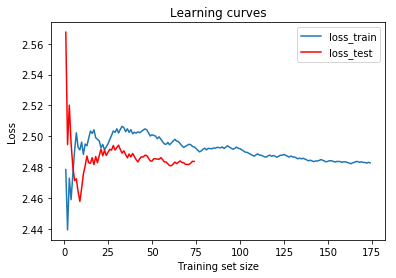

In [19]:
nc.plot_learning_curves(X_train, y_train, X_test, y_test, best_clf)

Ponovno iscrtavanje skupa podataka pred testiranje:


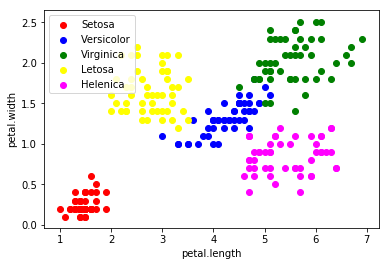

In [20]:
print('Ponovno iscrtavanje skupa podataka pred testiranje:')

colors = ['red', 'blue', 'green', 'yellow', 'magenta']
for c, cls in zip(colors, classes):
    subsample = df.loc[df['variety'] == cls]
    plt.scatter(subsample[attr1], subsample[attr2], color=c)

plt.xlabel(attr1)
plt.ylabel(attr2)

plt.legend(classes)

In [21]:
x1 = np.array([1, 0.5, 0.4]) # Setosa
x2 = np.array([1, 4.2, 1.2]) # Versicolor
x3 = np.array([1, 5.5, 2]) # Virginca
x4 = np.array([1, 2.9, 1.9]) # Letosa
x5 = np.array([1, 5.2, 0.8]) # Helenica

In [22]:
y_predict1 = best_clf.predict(x1)
y_predict2 = best_clf.predict(x2)
y_predict3 = best_clf.predict(x3)
y_predict4 = best_clf.predict(x4)
y_predict5 = best_clf.predict(x5)

print('~ TESTIRANJE KLASIFIKATORA ~')

print('Test 1:')
nc.Classifier.prediction_info(y_predict1, class_to_name_dict)
print()

print('Test 2:')
nc.Classifier.prediction_info(y_predict2, class_to_name_dict)
print()

print('Test 3:')
nc.Classifier.prediction_info(y_predict3, class_to_name_dict)
print()

print('Test 4:')
nc.Classifier.prediction_info(y_predict4, class_to_name_dict)
print()

print('Test 5:')
nc.Classifier.prediction_info(y_predict5, class_to_name_dict)
print() 

~ TESTIRANJE KLASIFIKATORA ~
Test 1:
Prediction vector: [0.23359761 0.2425432  0.24301812 0.23462993 0.23896665]
Max prediction value: 0.24301811882010818 (at position 2)
Class: Virginica

Test 2:
Prediction vector: [0.18052789 0.20631992 0.21578502 0.19538534 0.2138268 ]
Max prediction value: 0.21578501674034903 (at position 2)
Class: Virginica

Test 3:
Prediction vector: [0.16759511 0.19714974 0.20895112 0.18580283 0.20748665]
Max prediction value: 0.20895112342156064 (at position 2)
Class: Virginica

Test 4:
Prediction vector: [0.19298685 0.21534494 0.22262572 0.20532076 0.21995098]
Max prediction value: 0.22262572018271842 (at position 2)
Class: Virginica

Test 5:
Prediction vector: [0.17225049 0.20022669 0.21117313 0.18884321 0.20964362]
Max prediction value: 0.21117313401486532 (at position 2)
Class: Virginica

